# Violin plots explained

## Libraries

In [1]:
%load_ext watermark

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:70% !important;}</style>"))

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import seaborn as sns 
import pandas as pd

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
%watermark --iversions

numpy      1.17.2
matplotlib 3.1.1
json       2.0.9
pandas     0.25.1
seaborn    0.9.0
autopep8   1.4.4



## Violin plots

In general, violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot we can find the same information as in the box plots:
* median (a white dot on the violin plot)
* interquartile range (the black bar in the center of violin)
* the adjacent values (the black lines stretched from the bar) - defined as `first quartile - 1.5 IQR` and `third quartile + 1.5 IQR` respectively. These values can be used in a simple outlier detection technique (Tukey's fences) - observations lying outside of these "fences" can be considered outliers.

The unquestionable advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data. This is of interest, especially when dealing with multimodal data, *i.e.*, a distribution with more than one peak.

## Implementation in Python

We start by defining the number of random observations we will draw from certain distributions, as well as setting the seed for reproducibility of the results.

In [6]:
N = 10 ** 4
np.random.seed(42)

Then, we define a function plotting the following:
* a histogram with a kernel density estimate (KDE)
* a boxplot
* a violin plot

We will use this function for inspecting the randomly created samples.

In [7]:
def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True)
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show() 

### Standard Normal distribution

We start with the most basic distribution - Standard Normal. We draw 10000 numbers at random and plot the results. Some of the observations we can make:
* in the histogram we see the symmetric shape of the distribution
* we can see the previously mentioned metrics (median, IQR, Tukey's fences) in both the box plot as well as the violin plot
* the kernel density plot used for creating the violin plot is the same as the one added on top of the histogram. Wider sections of the violin plot represent a higher probability of observations taking a given value, the thinner sections correspond to a lower probability.

I believe that showing these three plots together provides good intuition to what a violin plot actually is and what kind of information it contains.

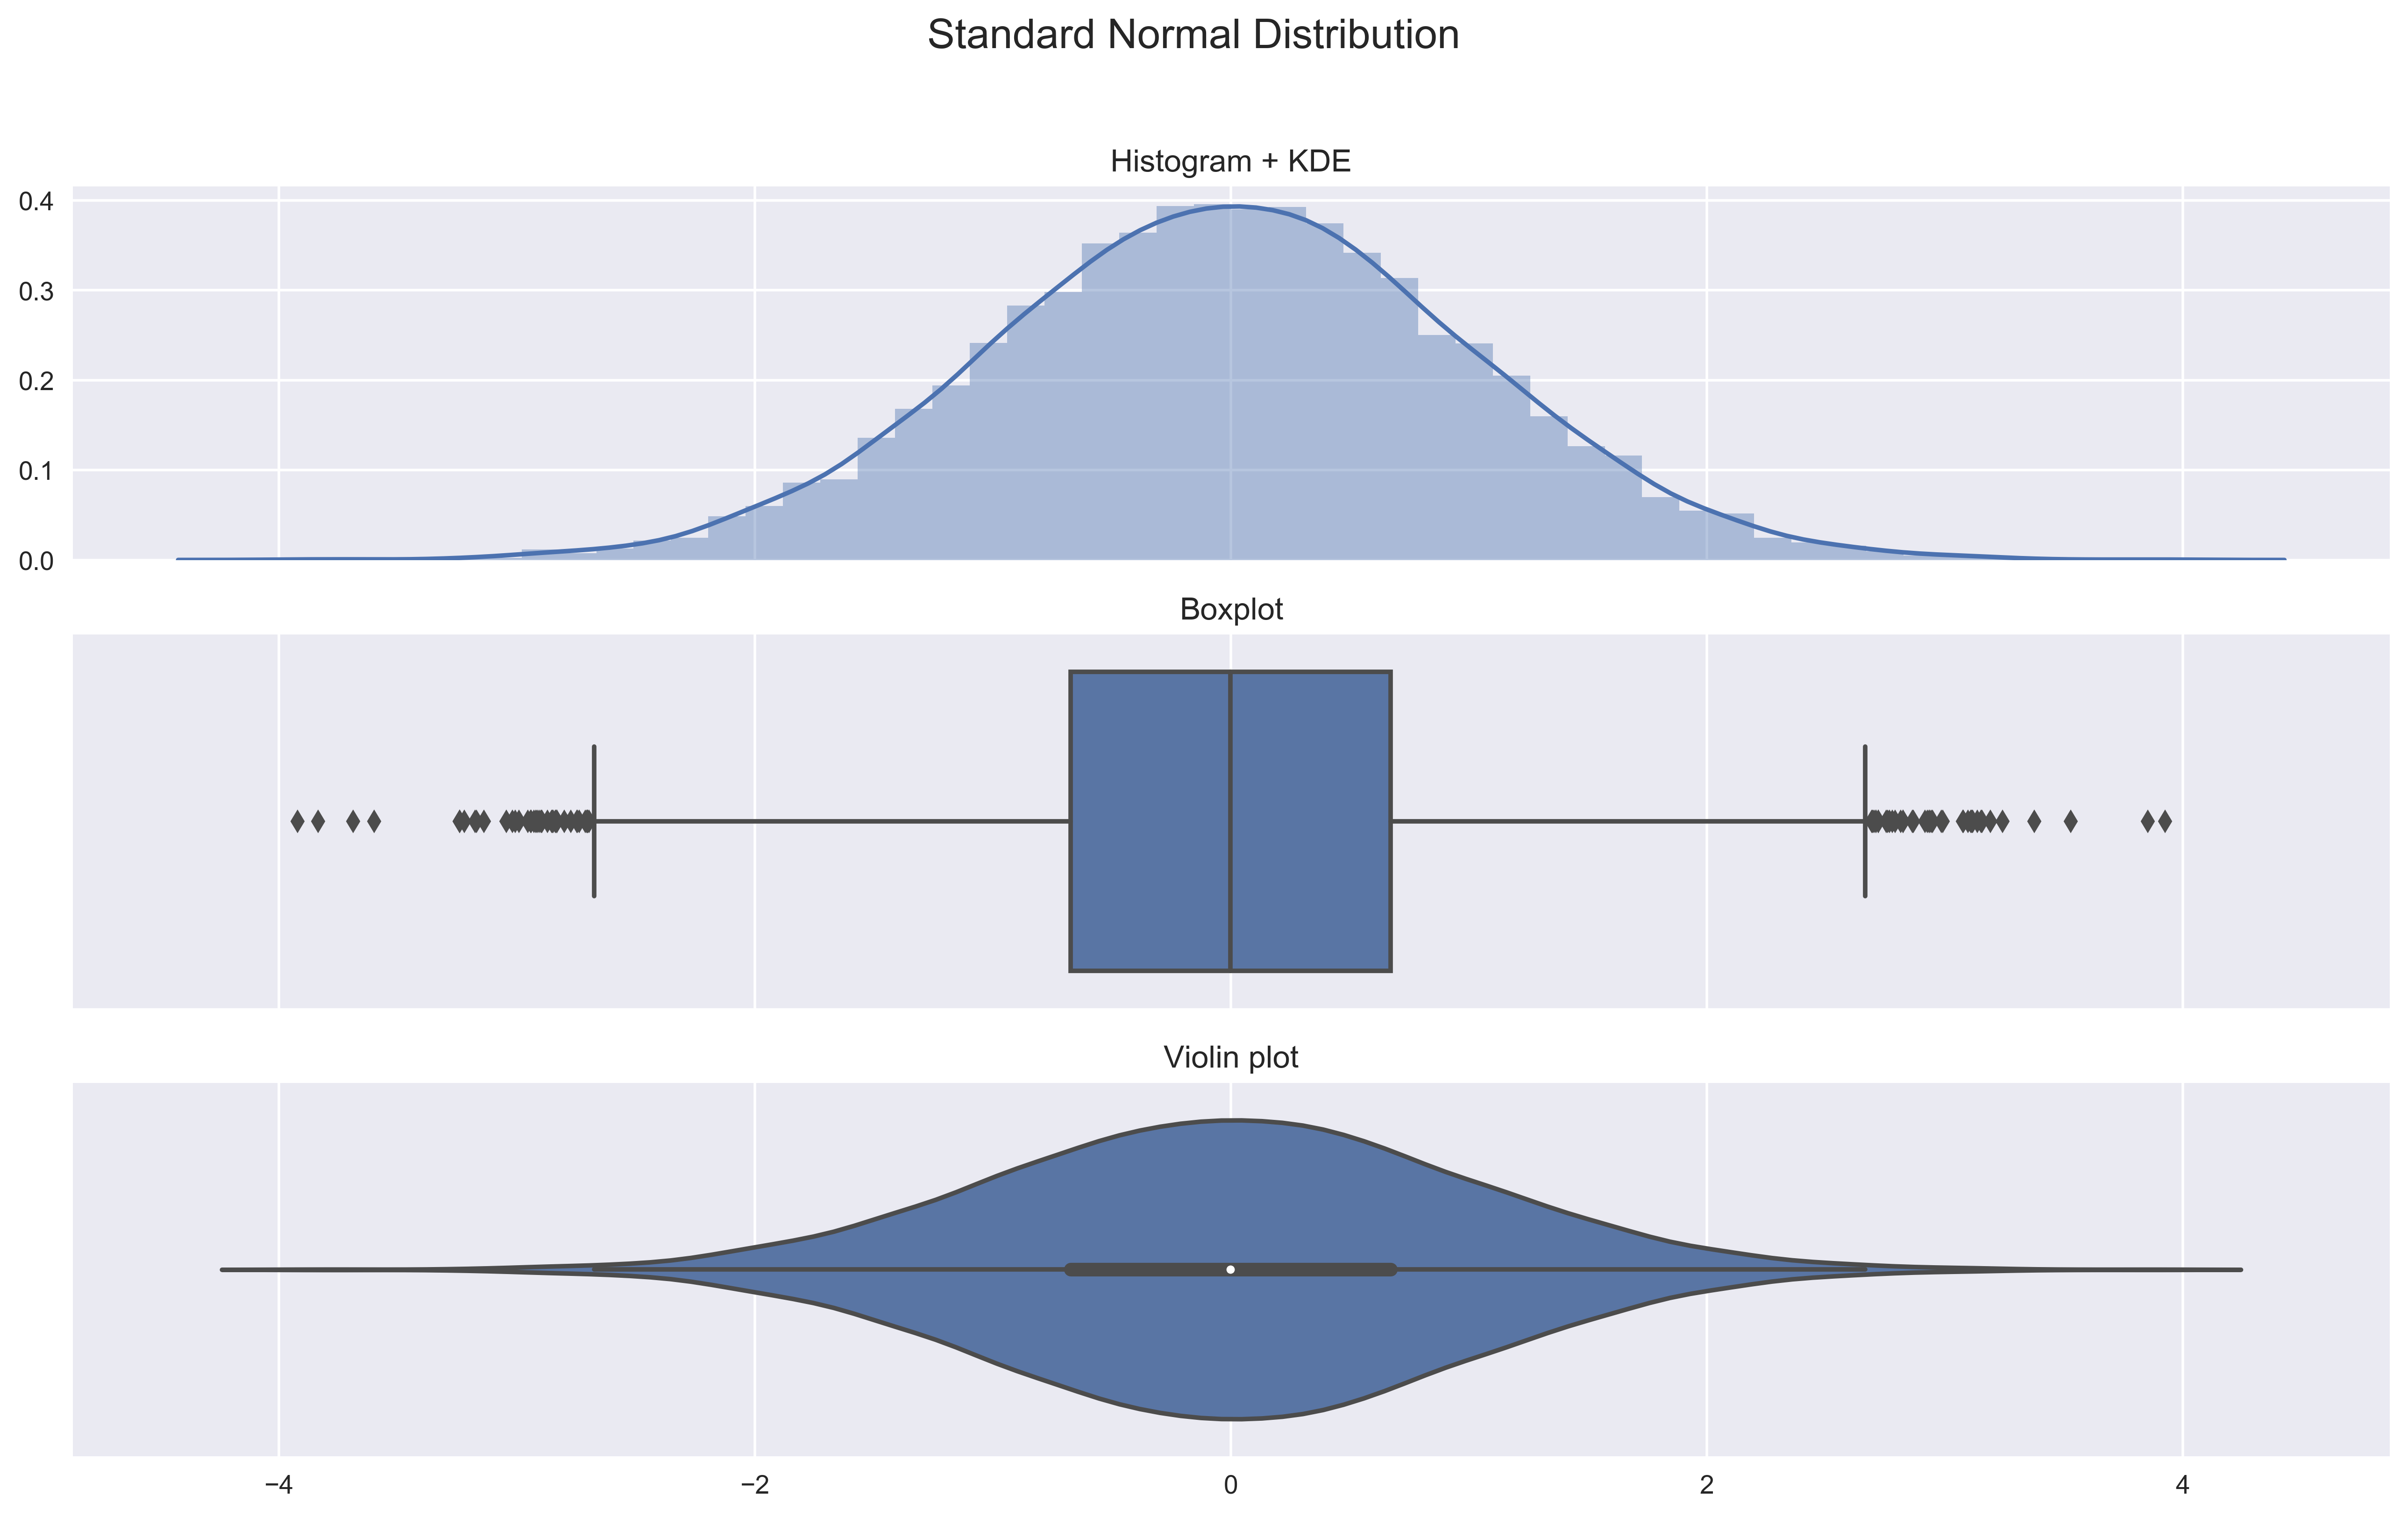

In [8]:
sample_gaussian = np.random.normal(size=N)
plot_comparison(sample_gaussian, 'Standard Normal Distribution')

### Log-normal distribution

In the second example, we consider the log-normal distribution, which is definitely more skewed than the Normal distribution.

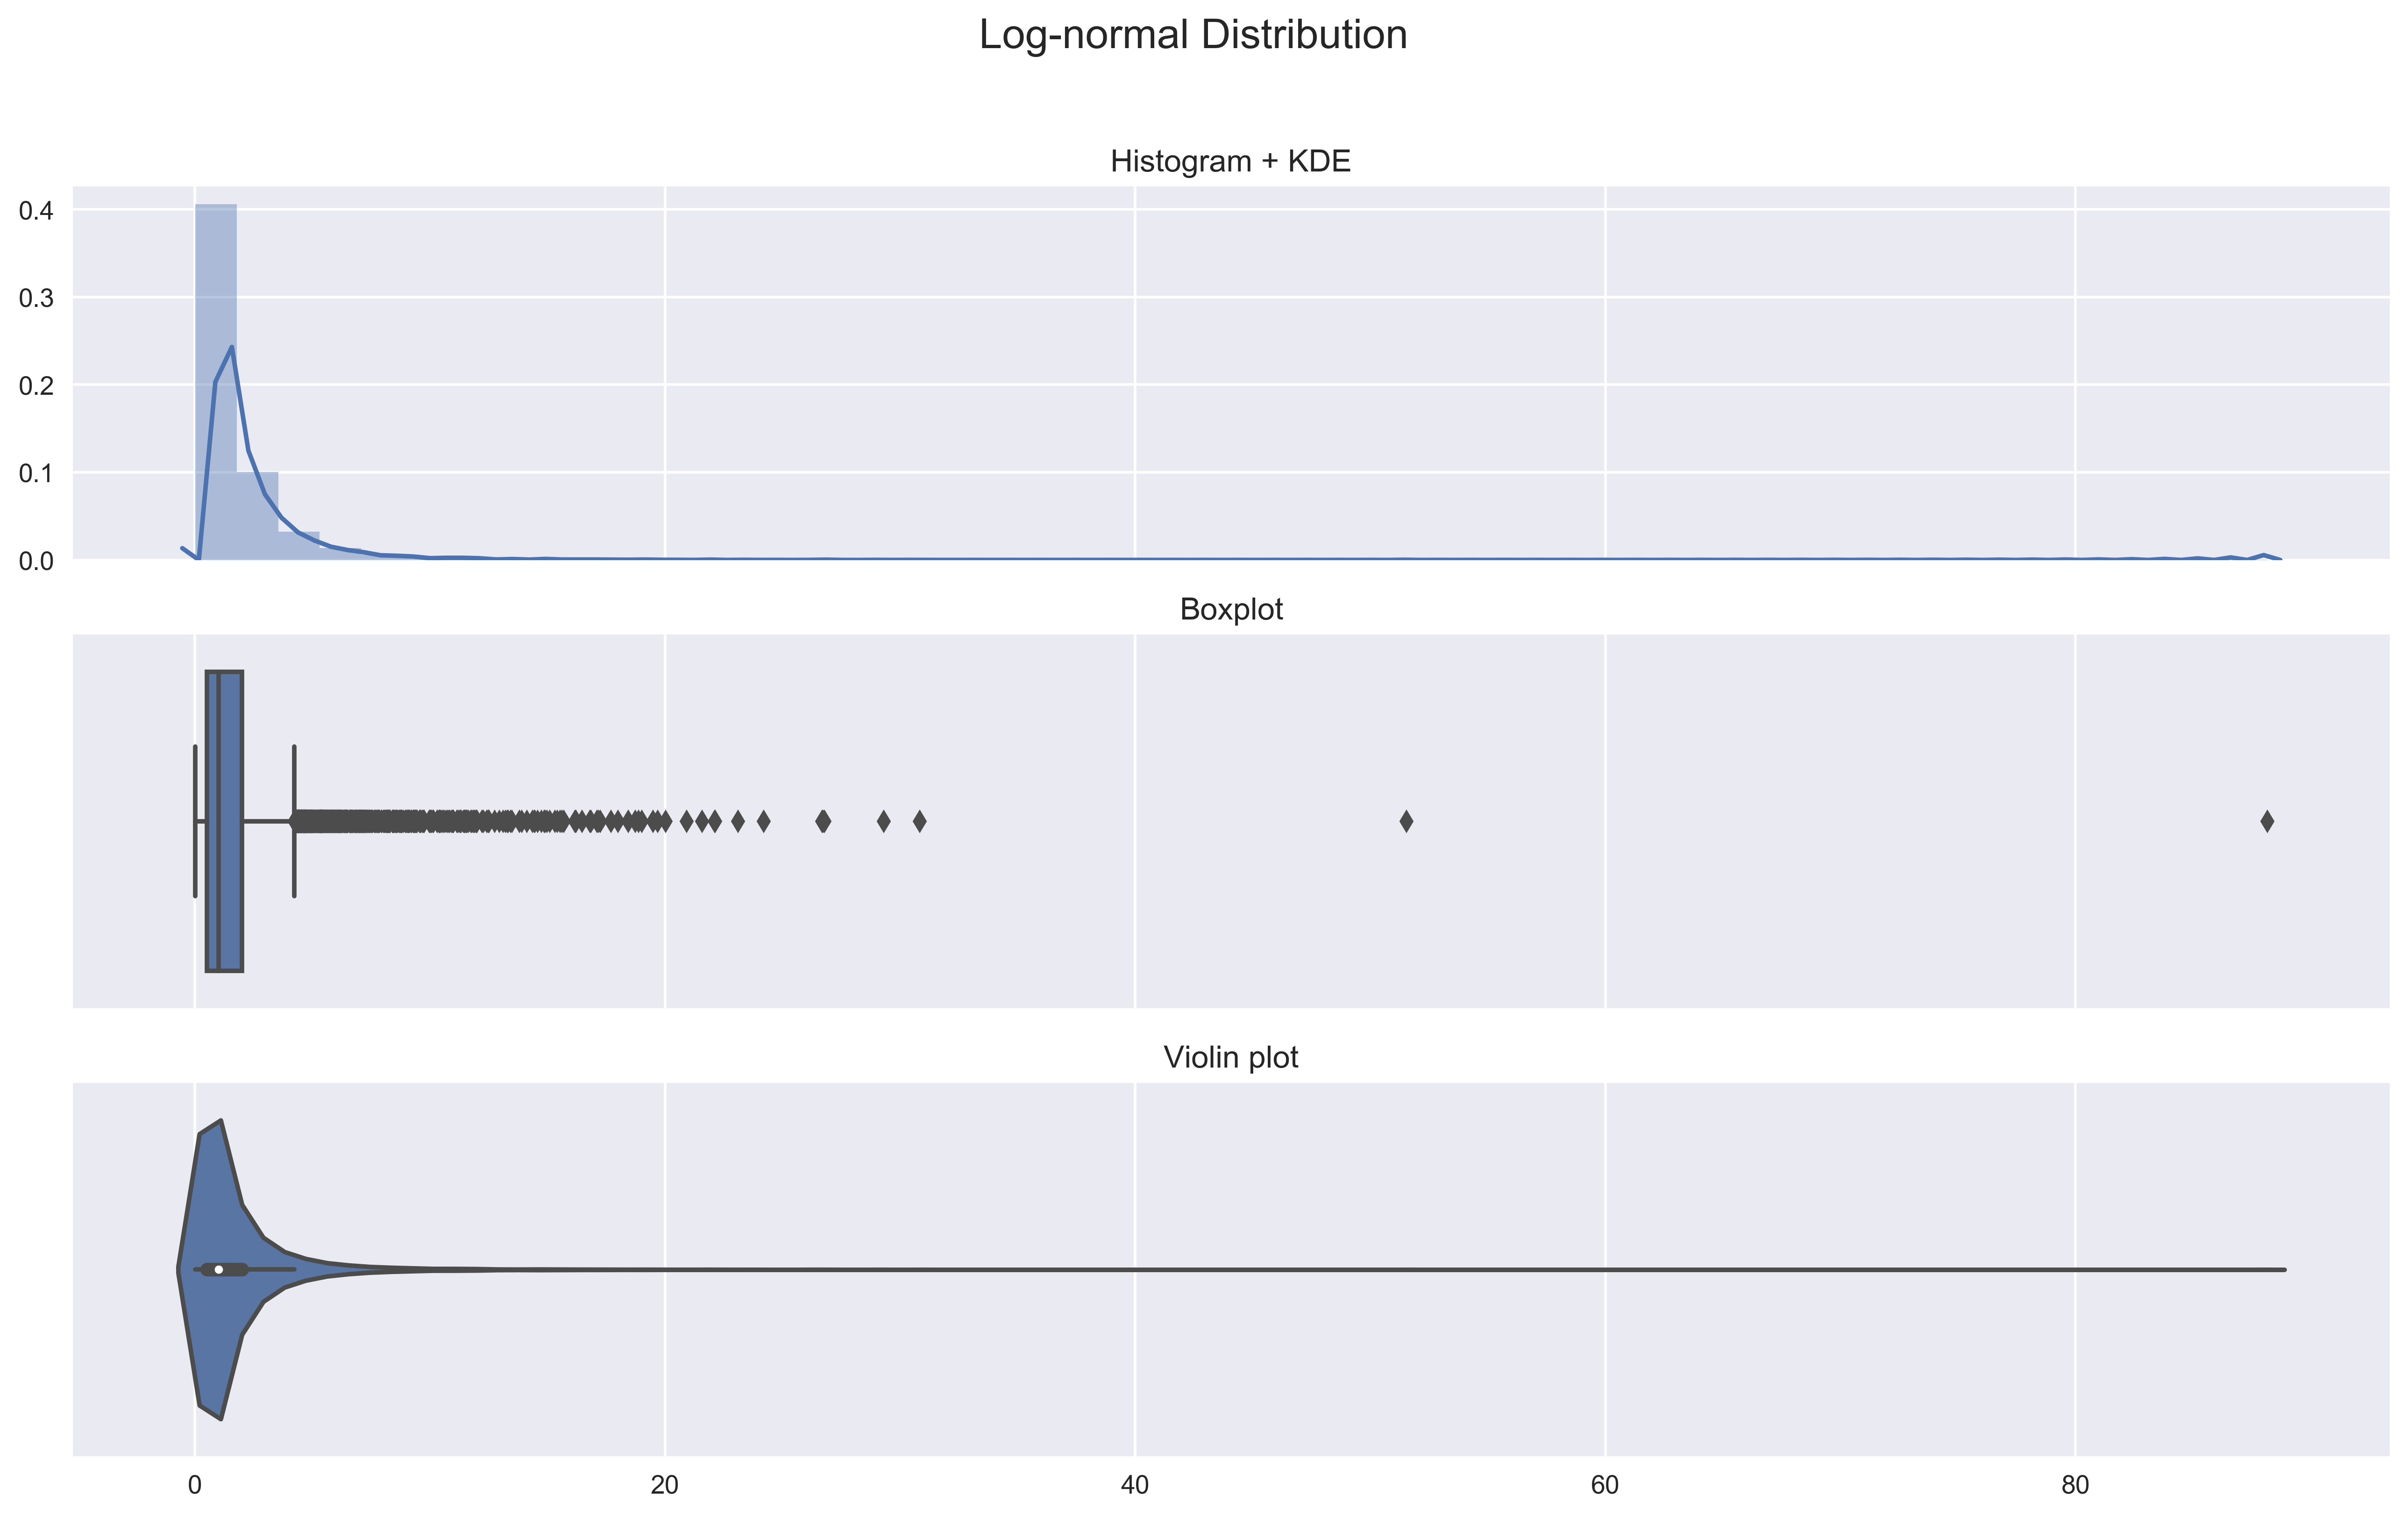

In [9]:
sample_lognormal = np.random.lognormal(size=N)
plot_comparison(sample_lognormal, 'Log-normal Distribution')

### Mixture of Gaussians - bimodal

In the previous two examples we have already seen that the violin plots contain more information than the box plot. This is even more apparent when we consider a multimodal distribution. In this example, we create a bimodal distribution as a mixture of two Gaussian distributions.

Without looking at a histogram/density plot, it would be impossible to spot the two peaks in our data.

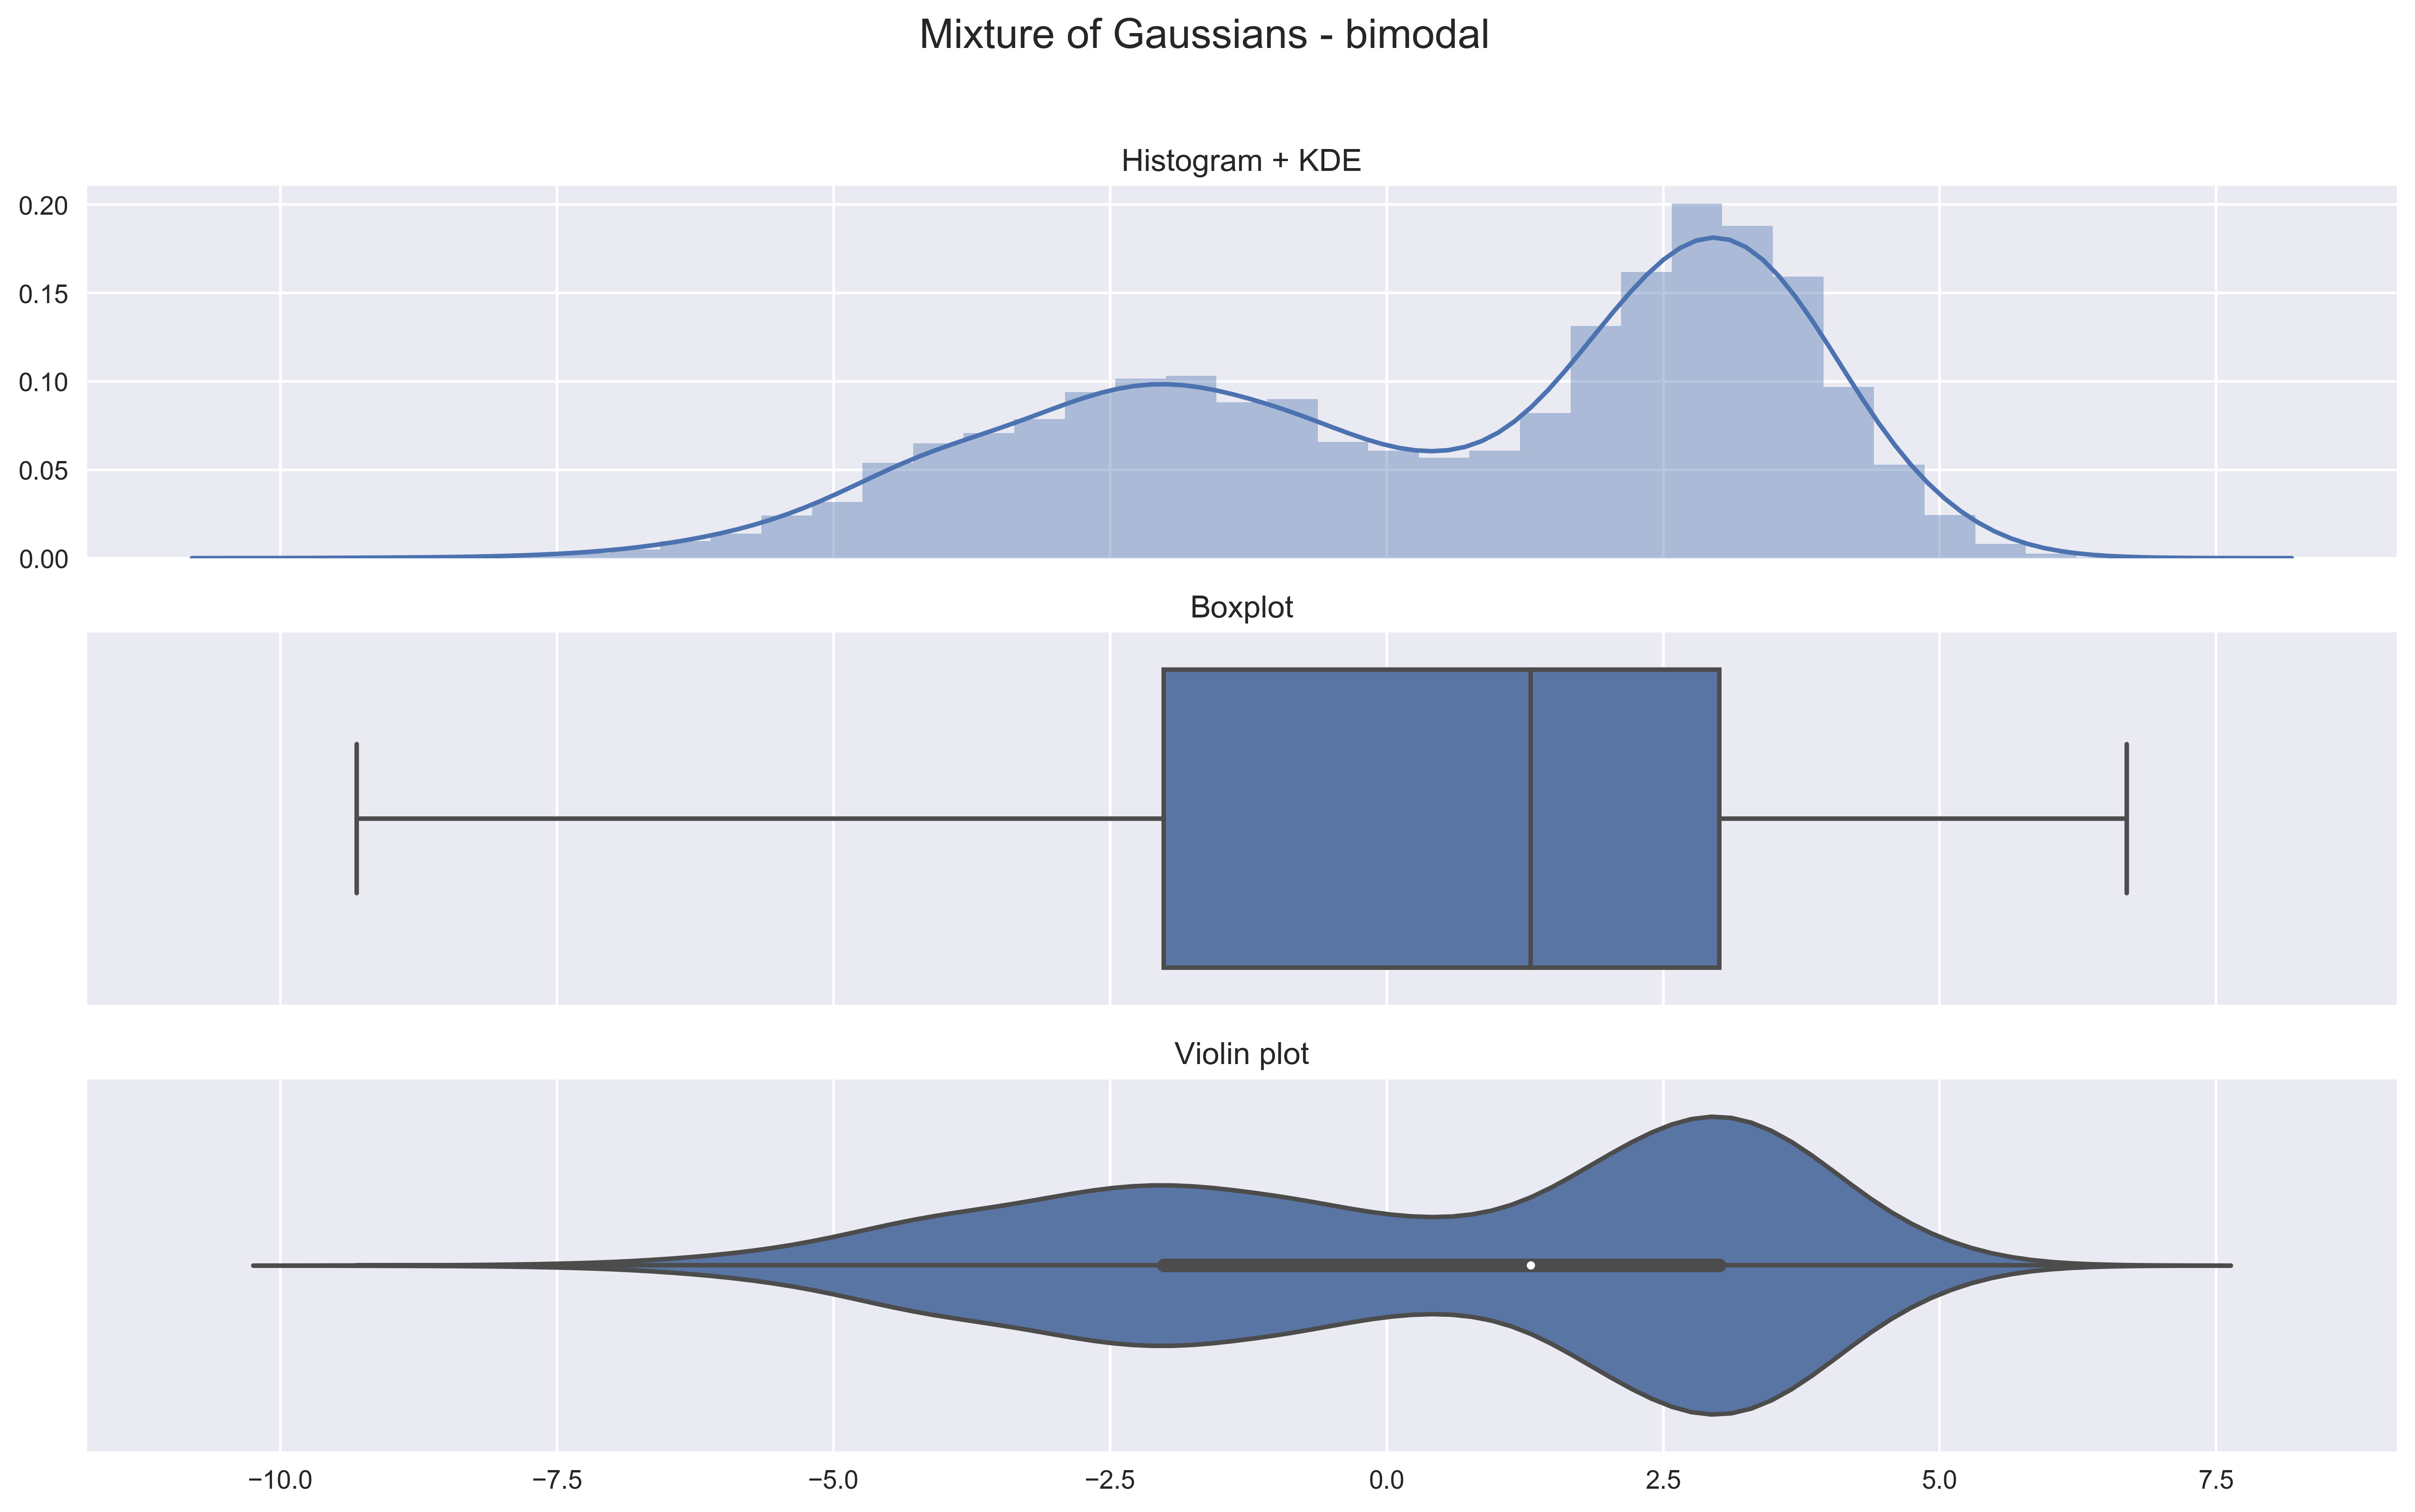

In [10]:
sample_bimodal = np.concatenate([np.random.normal(loc=-2, scale=2, size=int(N/2)),
                                 np.random.normal(loc=3, scale=1, size=int(N/2))])
plot_comparison(sample_bimodal, 'Mixture of Gaussians - bimodal')

## Advanced usage

Violin plots are often used to compare the distribution of a given variable across some categories. We present a few of the possibilities below. To do so, we load the `tips` dataset from `seaborn`.

In [11]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In the first example, we look at the distribution of the tips per gender. Additionally, we change the structure of the violin plot to display the quartiles only. Some other possibilities include `point` for showing all the observations or `box` for drawing a small box plot inside the violin plot.

We see that the overall shape and distribution of the tips are similar for both genders (quartiles very close to each other), but there are more outliers in the case of males.

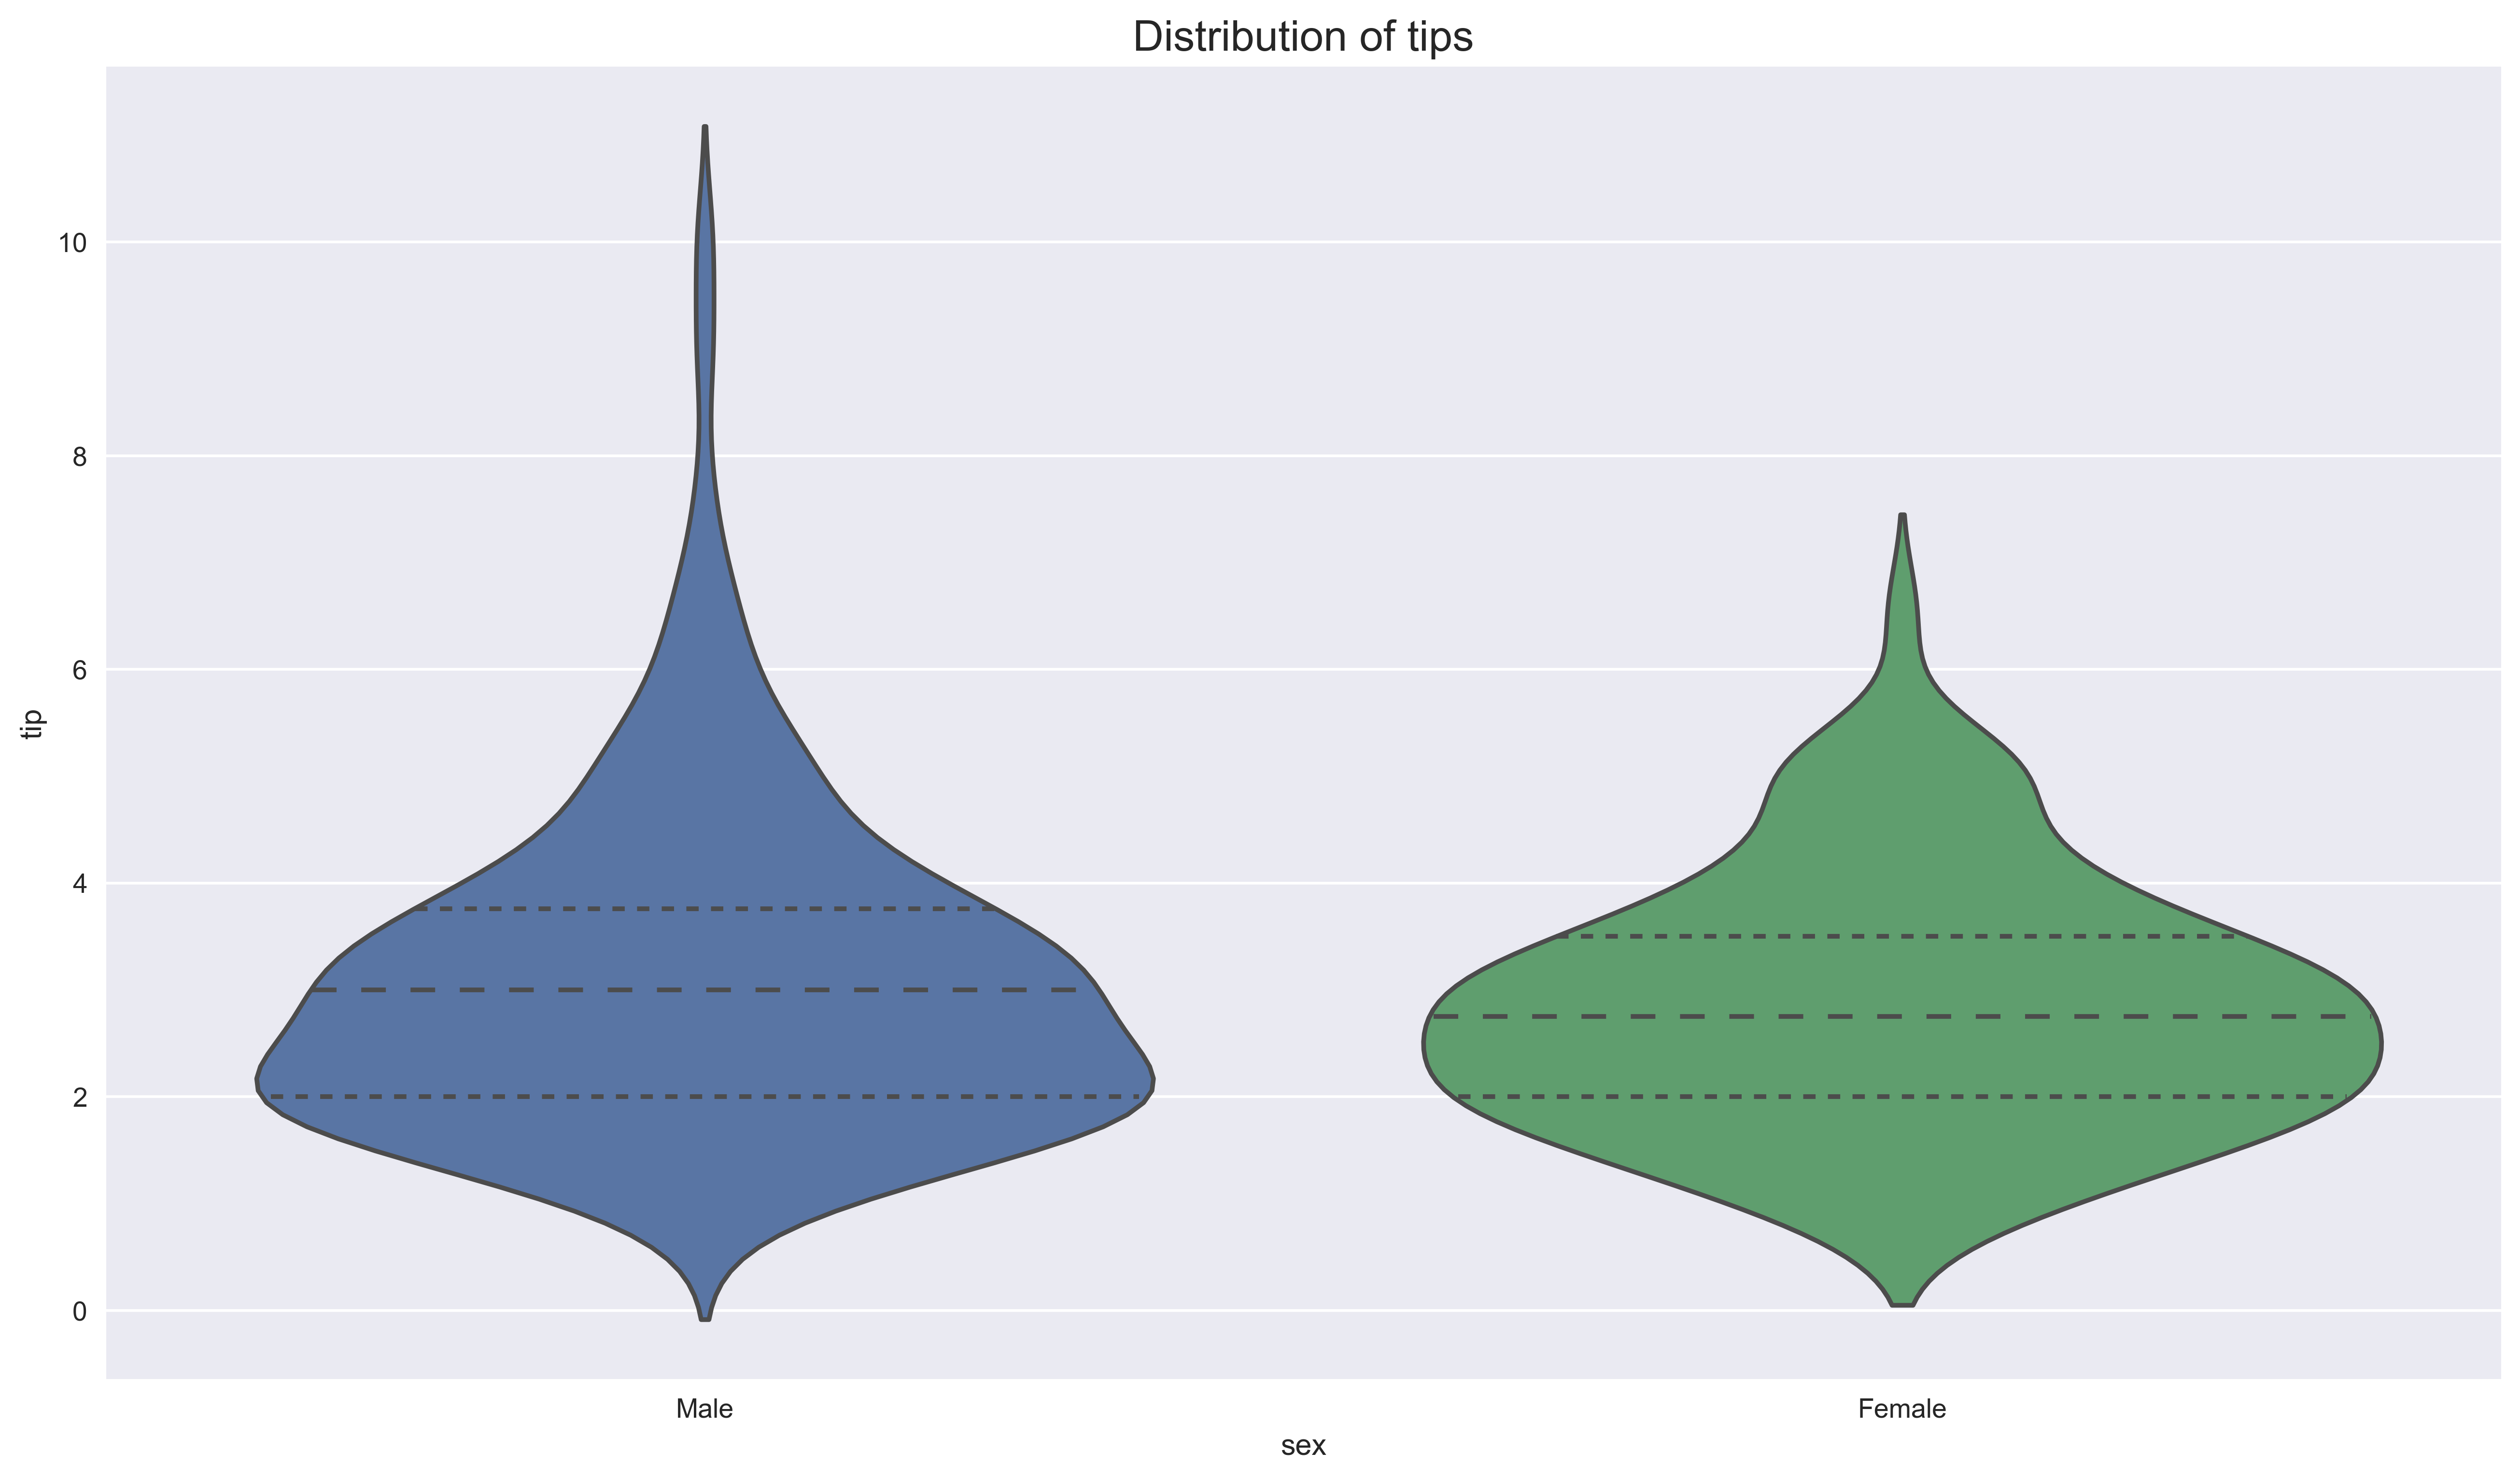

In [12]:
ax = sns.violinplot(x="sex", y="tip", inner='quartile', data=tips)
ax.set_title('Distribution of tips', fontsize=16);

In the second example, we investigate the distribution of the total bill amount per day. Additionally, we split by gender. Immediately we see that the largest difference in the shape of the distribution between genders happens on Fridays.

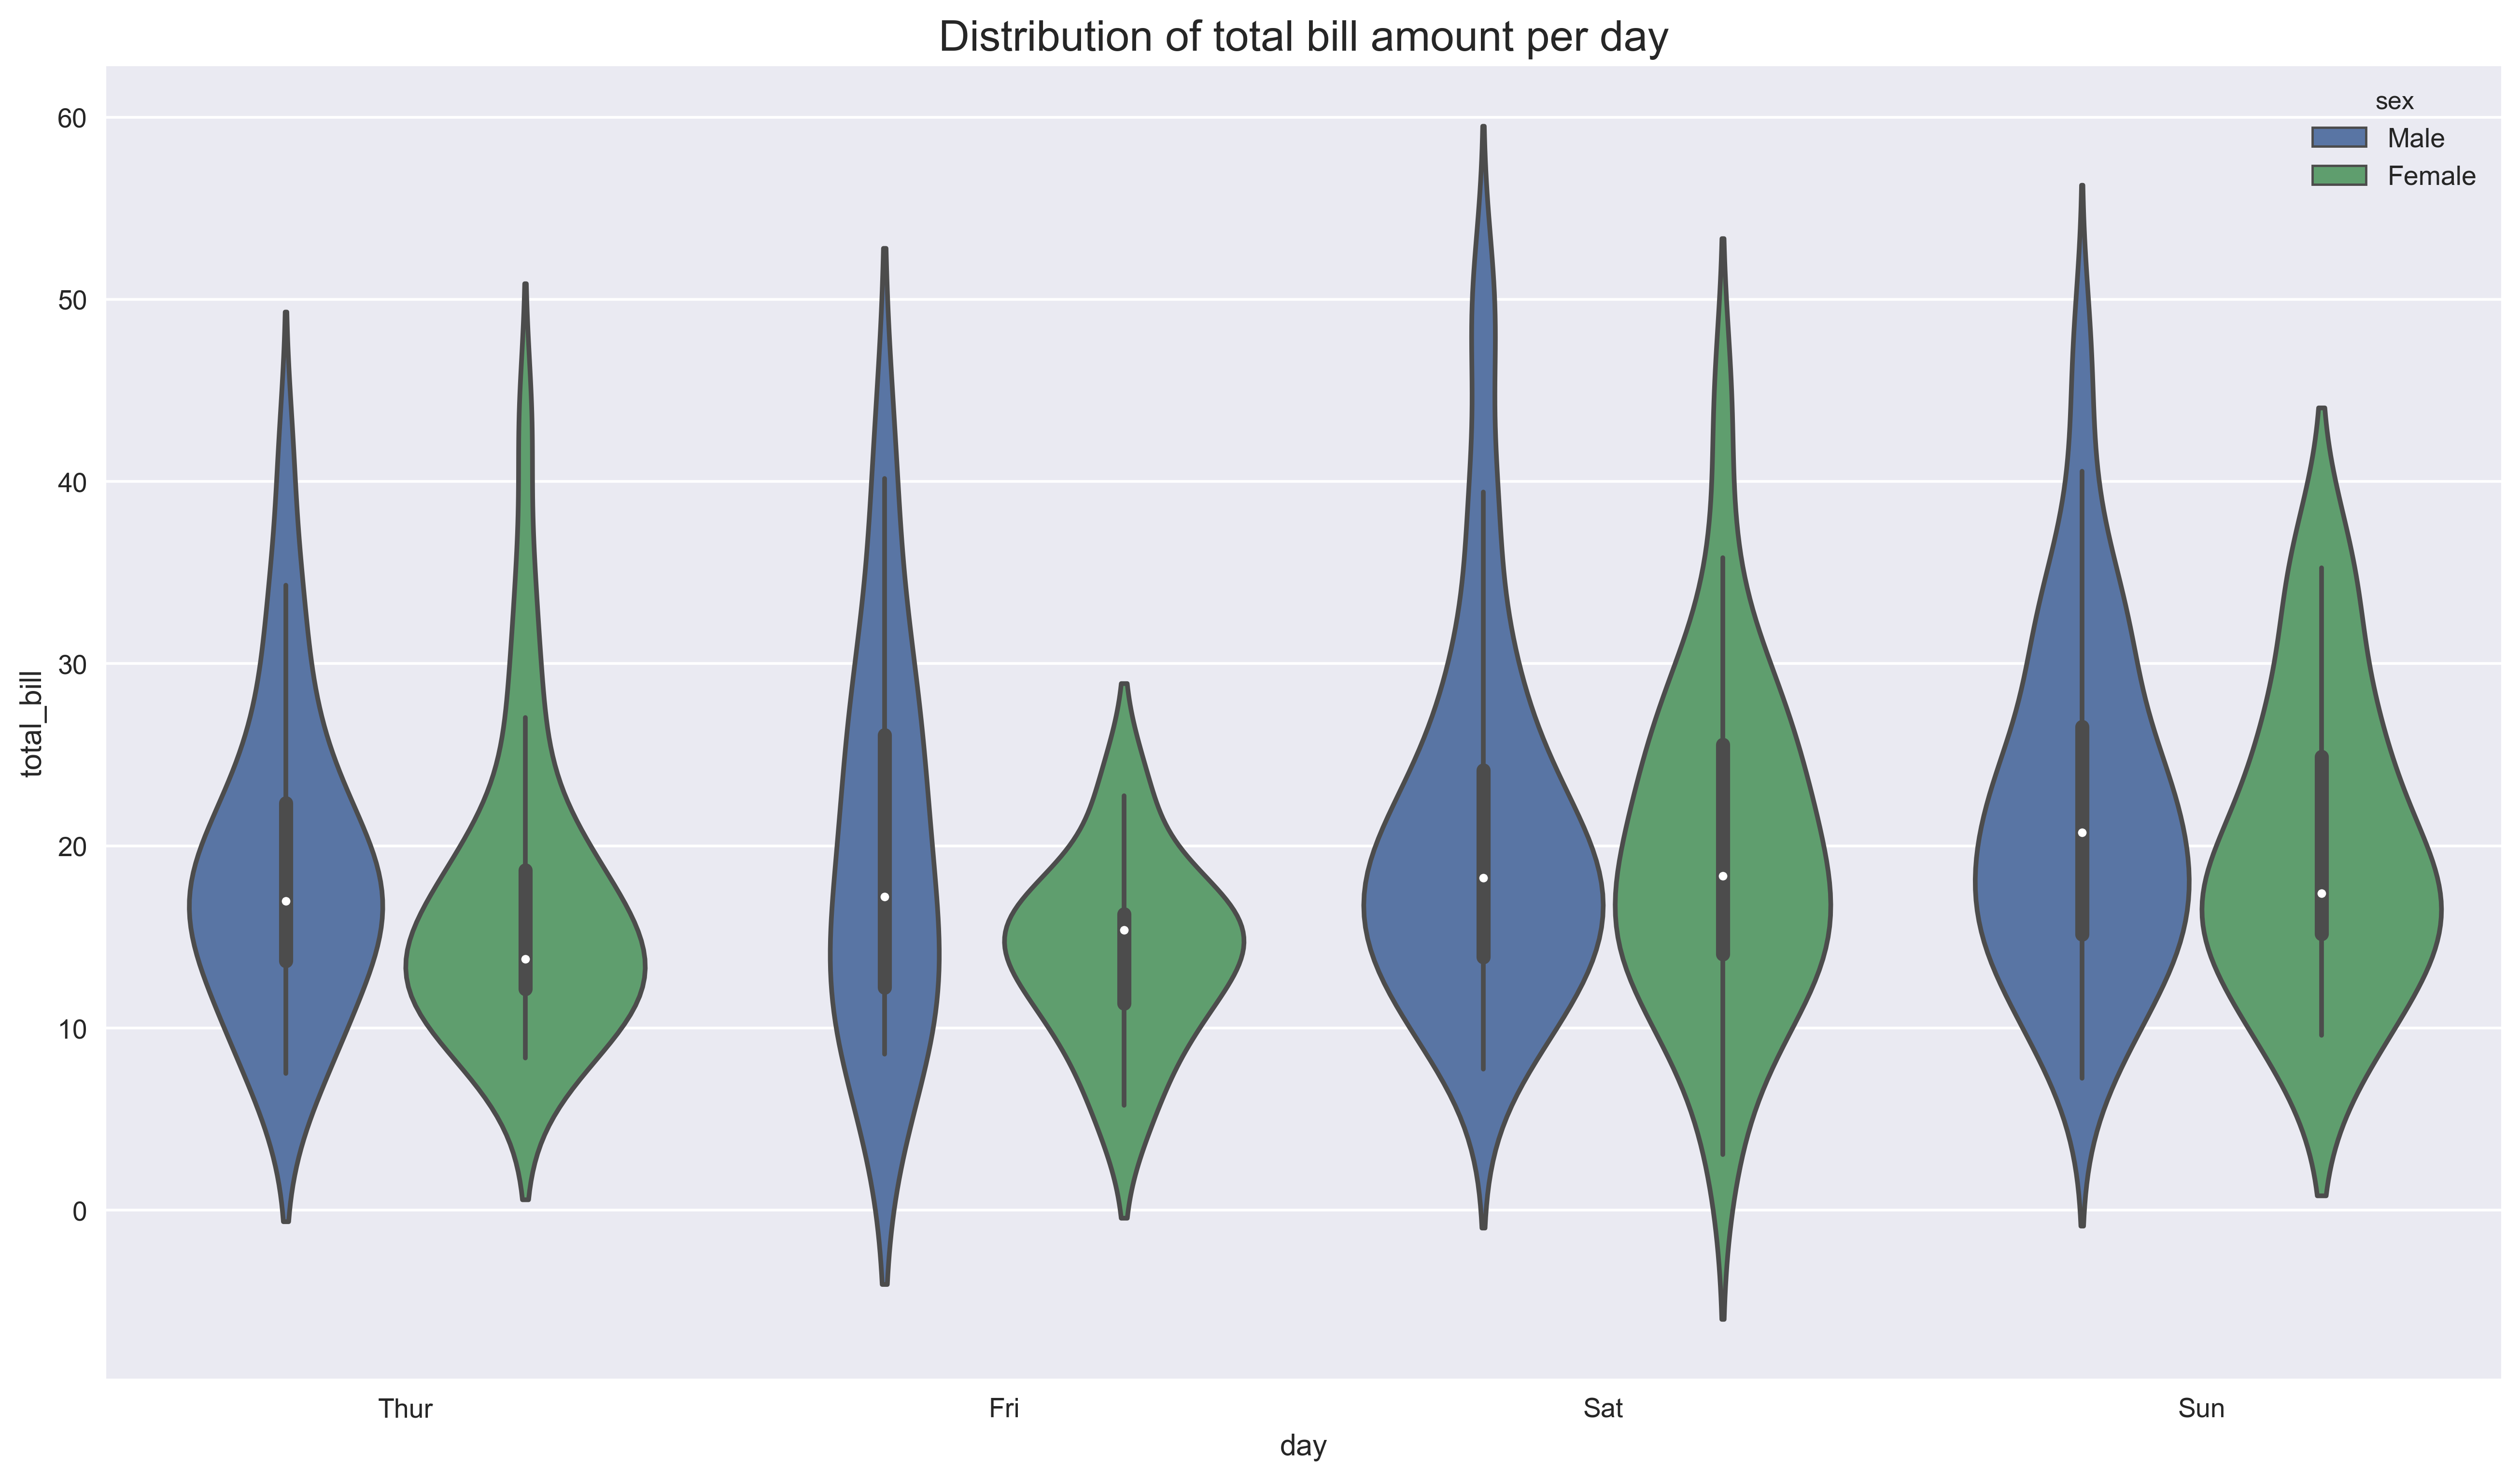

In [13]:
ax = sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
ax.set_title('Distribution of total bill amount per day', fontsize=16);

In the last example, we investigate the same thing as in the previous case, however, we set `split=True`. By doing so, instead of 8 violins, we end up with four - each side of the violin corresponds to a different gender.

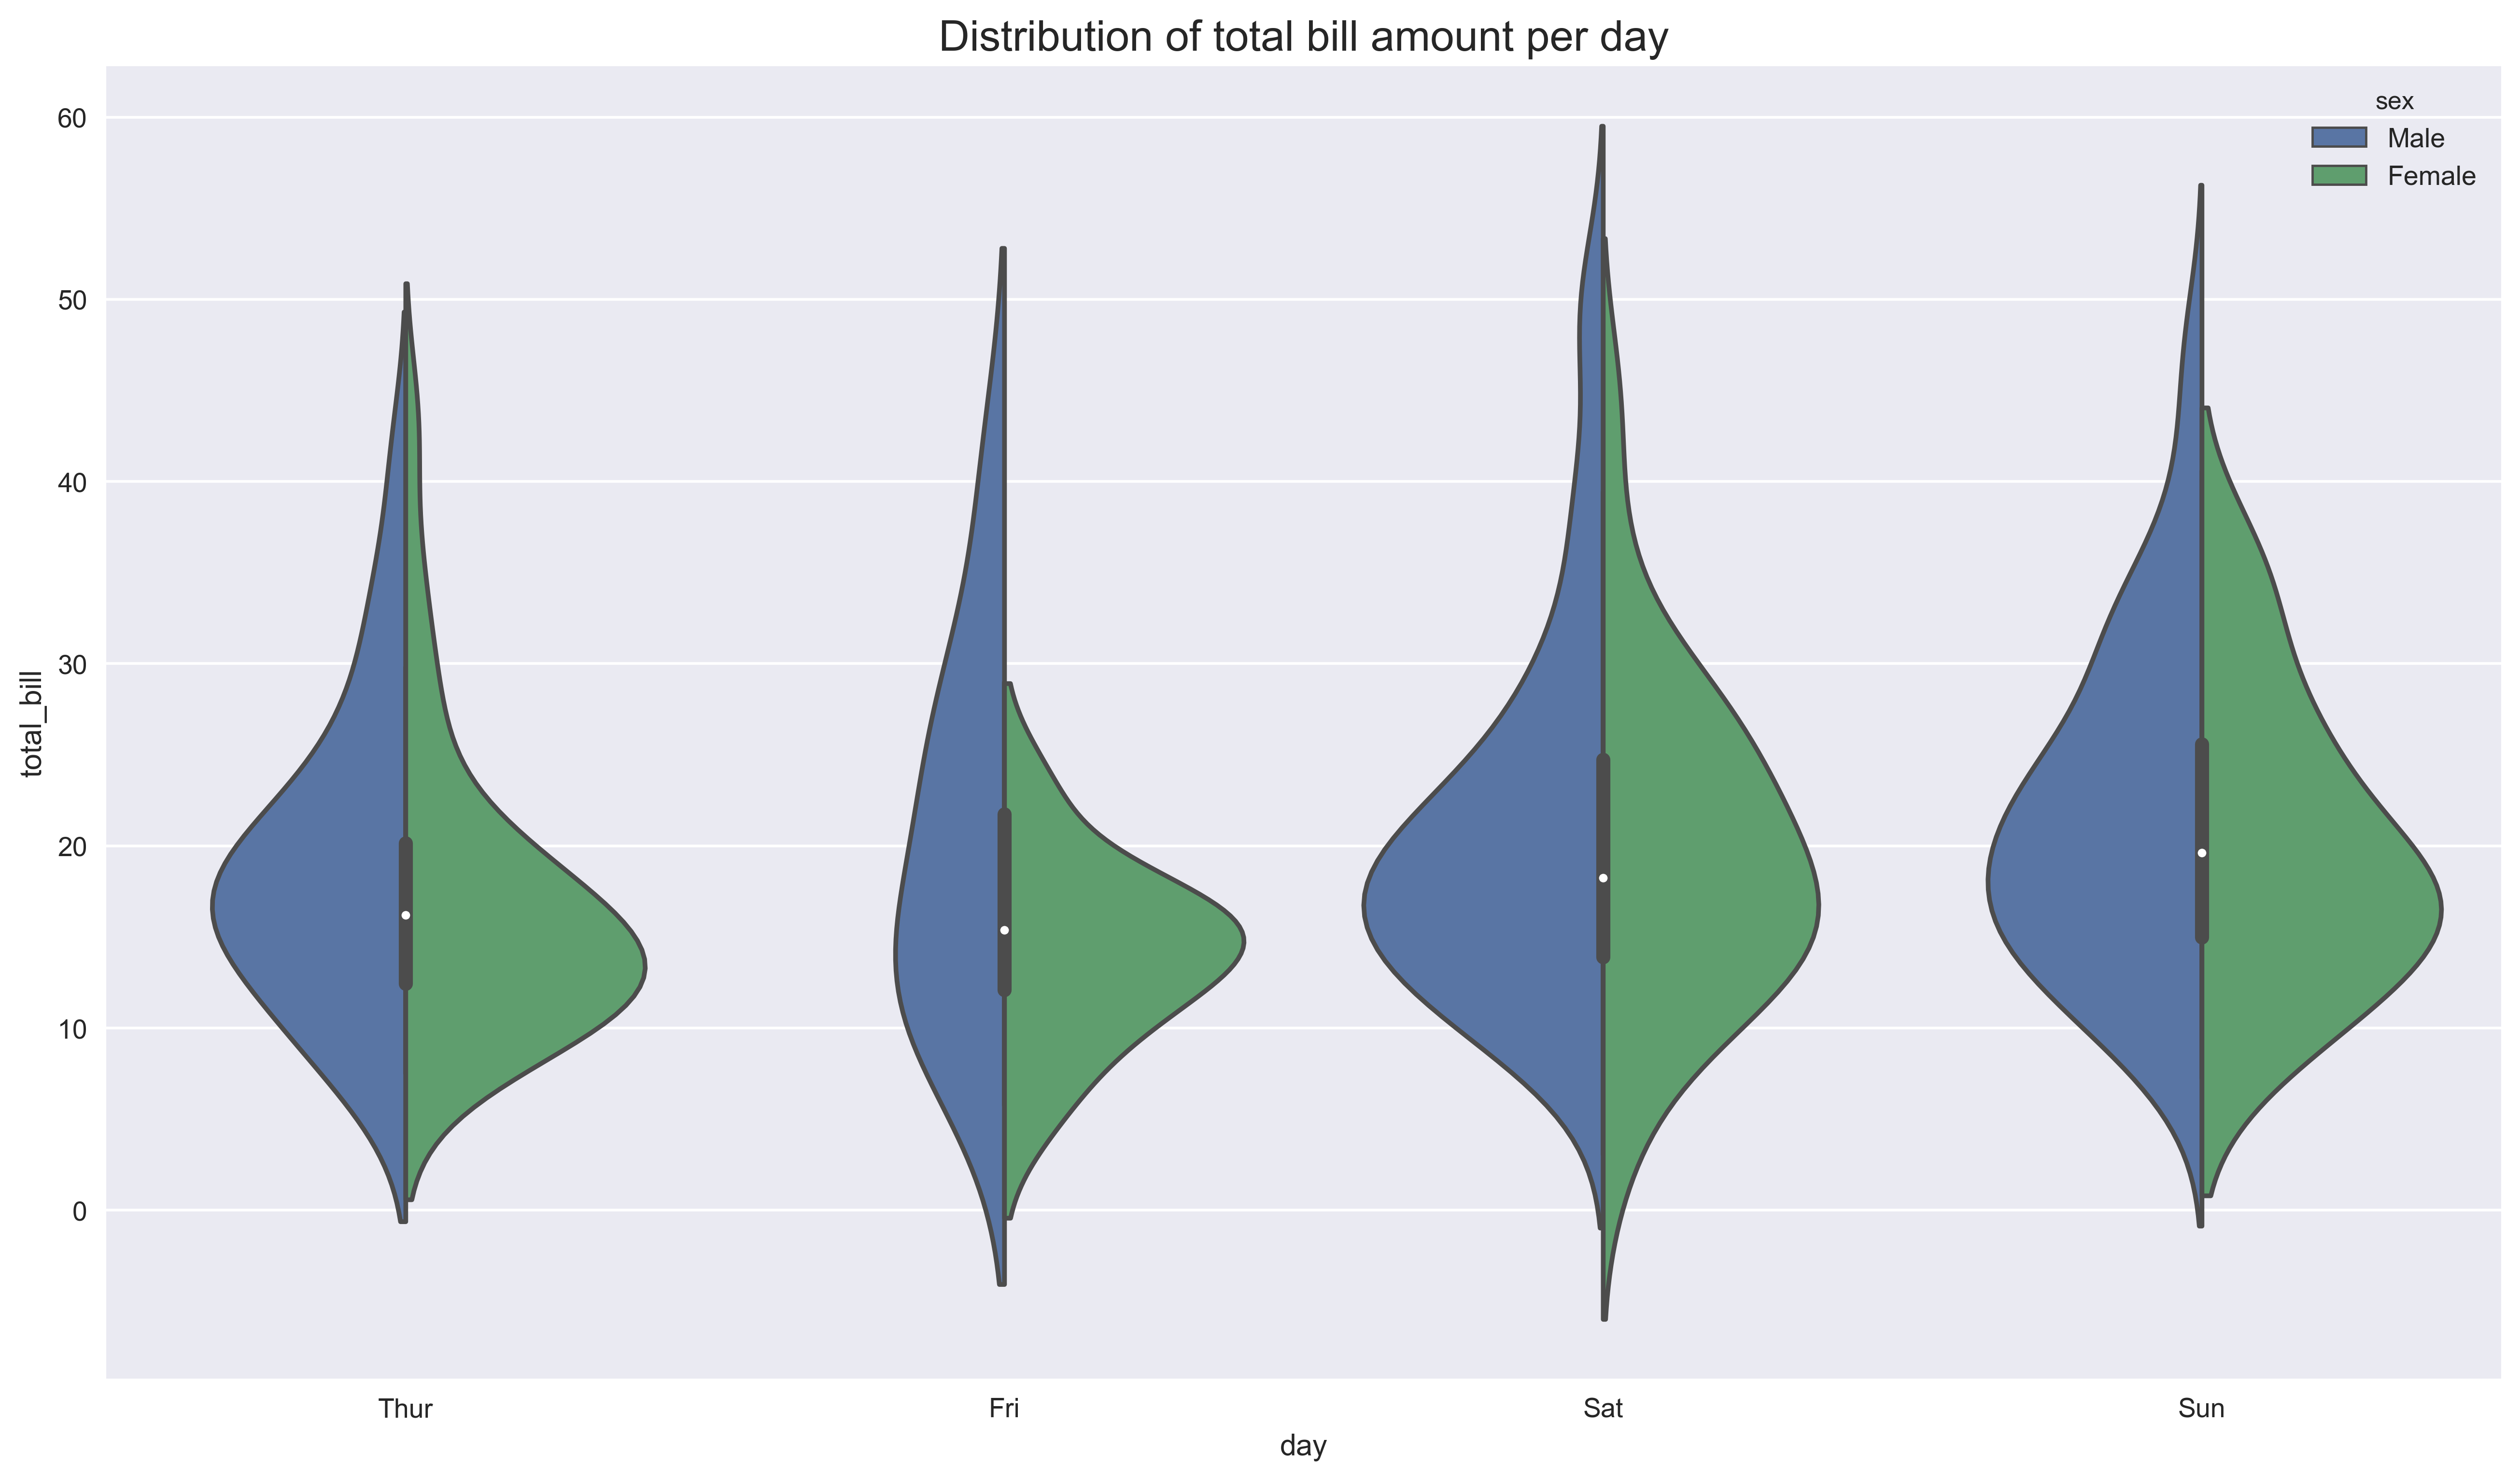

In [14]:
ax = sns.violinplot(x="day", y="total_bill", hue="sex", split=True, data=tips)
ax.set_title('Distribution of total bill amount per day', fontsize=16);

## Conclusions

In this article, I showed what are violing plots, how to interpret them and what are their advantages over box plot. One last remark worth making is that box plots do not adapt as long as the quartiles stay the same. We can modify the data in a way that the quartiles do not change, but the shape of the distribution differs dramatically. The following GIF illustrates the point.